# **Árbol de Decisión**

```
Autor : Luis Beltran Palma Ttito
Lugar : Cusco, Perú, 2023.
Proposito : Árbol de Decisión en la clasificacion de data set de iris con el metodo de arbol de decision
```

## **1. Librerias a utilizar**

In [2]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [7]:
datos = pd.read_csv('iris.csv', sep=',')
datos.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## **3. Descripcion de datos**

In [8]:
# Estadisticos basicos por atributos
print(datos.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## **4. Histograma**

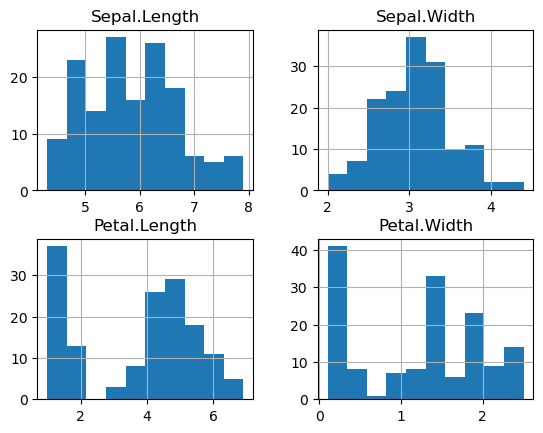

In [9]:
datos.hist()
plt.show()

## **5. Distribucion de clases**

In [11]:
# Numero de registros por especie de iris
print(datos.groupby('Species').size())

Species
setosa        50
versicolor    50
virginica     50
dtype: int64


## **6. Separación de datos, para entrenamiento y test**

In [12]:
x = datos.drop(['Species'], axis = 1)
y = datos['Species']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5)

## **7. Entrenamiento de árbol de decisión**

In [13]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
# criterio: gini
# max_depth (max profundidad): 2
ArbolDecision = DecisionTreeClassifier(criterion='entropy', max_depth=6)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

## **Test AD**

In [14]:
ArbolDecision.score(x_test, y_test)

0.9210526315789473

## **8. Gráfica de árbol de decisión**

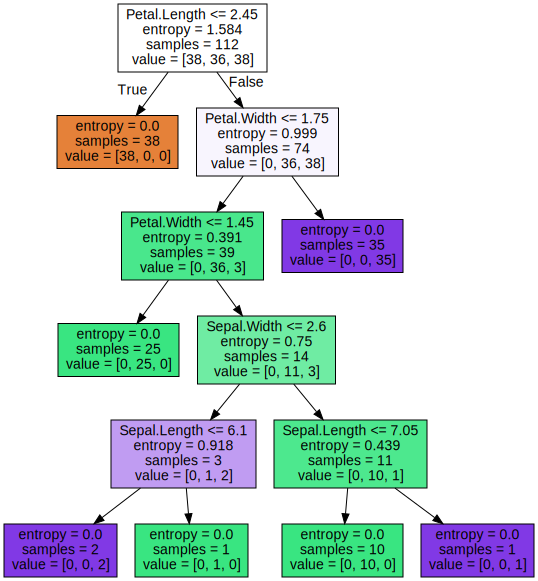

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **9. Test**

In [16]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica']
82     versicolor
134     virginica
114     virginica
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
66     versicolor
133     virginica
102     virginica
107     virginica
26         setosa
23         setosa
123     virginica
130     virginica
21         setosa
12         setosa
71     versicolor
128     virginica
48         setosa
72     versicolor
88     versicolor
148     virginica
74     versicolor
96     versicolor
63     versicolor
132     virginica
39         setosa

## **10. Matriz de confusión y métricas**

In [17]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]
Exactitud =  0.9210526315789473


## **11. Prediccion**

In [18]:
nuevo = np.array([[1.7, 0.3, 5.7, 3.8]])

pred = ArbolDecision.predict(nuevo)
print(pred)

['virginica']


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
